**Hyper-Parameter Tuning**
---

It's a method used to find the optimal parameters for a machine learning algorithm.
It's important to search what parameters the algorithm offers and I can tune.

Best results:


*   Decision Tree: 0.95%
*   Random Forest: 0.96%
*   KNN: 0.93%
*   Logistic Regression: 0.95%
*   SVM: 0.95%
*   MLP: 0.98% with scaled data


In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [3]:
data, target = load_breast_cancer(return_X_y=True)

In [4]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

Decision Tree
---


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'random'},
 0.9507374631268437)

Random Forest
---

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 10},
 0.9648501785437045)

KNN
---

In [ ]:
parameters = {'n_neighbors': [7, 9, 11],
              'p': [1, 2]}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'n_neighbors': 9, 'p': 1}, 0.9385188635305077)

Logistic Regression
---

In [ ]:
parameters = {'solver': ['liblinear', 'lbfgs', 'sag'],
              'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0]}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'C': 1.5, 'solver': 'liblinear', 'tol': 0.0001}, 0.9543238627542309)

Support Vector Machine
---

In [ ]:
parameters = {'C': [1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly'],
              'tol': [0.001, 0.0001]}
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}, 0.9771619313771154)

MLP
---

In [ ]:
parameters = {'activation': ['relu', 'logistic', 'tanh'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'activation': 'logistic', 'batch_size': 10, 'solver': 'adam'},
 0.9243595714951095)

Cross Validation
---


In [5]:
from sklearn.model_selection import cross_val_score, KFold

In [6]:
tree_results = []
randomf_results = []
mlp_results = []
svm_results = []

In [7]:
for i in range(10):  # 300 tests with 10 splits and 30 random states is better
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, 
                                min_samples_split=5, splitter='random')
  score = cross_val_score(tree, data, target, cv=kfold)
  tree_results.append(score.mean())

In [8]:
for i in range(10):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  randomf = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, 
                                   min_samples_split=2, n_estimators=10)
  score = cross_val_score(randomf, data, target, cv=kfold)
  randomf_results.append(score.mean())

In [9]:
for i in range(10):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  svm_cls = SVC(C=1.5, kernel='rbf', tol=0.001)
  score = cross_val_score(svm_cls, data, target, cv=kfold)
  svm_results.append(score.mean())

In [ ]:
for i in range(10):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  mlp_cls = MLPClassifier(activation='logistic', batch_size=10, solver='adam')
  score = cross_val_score(mlp_cls, data, target, cv=kfold)
  mlp_results.append(score.mean())

In [12]:
svm_results # each result is the mean of 10 tests with different combinations of slices

[0.9789473684210526,
 0.9736215538847116,
 0.9753759398496239,
 0.9753759398496239,
 0.9771303258145363,
 0.9735902255639097,
 0.9806704260651629,
 0.9718671679197994,
 0.9718984962406015,
 0.975407268170426]

Results Analysis
---

In [13]:
results = pd.DataFrame({'Decision tree': tree_results,
                        'SVM': svm_results,
                        'Random forest': randomf_results,
                        'Neural Network': mlp_results})
results # this structure could be used to analyse the precision and recall too

,Decision tree,SVM,Random forest,Neural Network
0,0.936779,0.978947,0.956078,0.973684
1,0.947274,0.973622,0.950815,0.973653
2,0.945551,0.975376,0.950815,0.971898
3,0.929762,0.975376,0.956078,0.966604
4,0.934962,0.977130,0.954292,0.968327
5,0.938377,0.973590,0.963001,0.971805
6,0.942105,0.980670,0.954386,0.971898
7,0.936779,0.971867,0.954323,0.970113
8,0.934931,0.971898,0.959555,0.968327
9,0.938534,0.975407,0.961372,0.971867


In [14]:
results.describe() # best std = MLP and SVM
# the best algorithm here is SVM due to its score and std

,Decision tree,SVM,Random forest,Neural Network
count,10.000000,10.000000,10.000000,10.000000
mean,0.938506,0.975388,0.956071,0.970818
std,0.005241,0.002878,0.004118,0.002388
min,0.929762,0.971867,0.950815,0.966604
25%,0.935417,0.973598,0.954300,0.968773
50%,0.937578,0.975376,0.955232,0.971836
75%,0.941212,0.976700,0.958686,0.971898
max,0.947274,0.980670,0.963001,0.973684


In [15]:
results.std() / results.mean() * 100 # coefficient of variation

Decision tree     0.558487
SVM               0.295040
Random forest     0.430676
Neural Network    0.245984
dtype: float64

Statistical hypothesis testing
---
Is SVM better than Support Vector Machine and Random Forest?

In [16]:
alpha = 0.05  # confiability = 95%

p-value is the second value returned by shapiro

In [27]:
from scipy.stats import shapiro  # verify normal distributions
shapiro(mlp_results), shapiro(svm_results), shapiro(randomf_results)

((0.9012841582298279, 0.22631269693374634),
 (0.9348790645599365, 0.49755704402923584),
 (0.9243408441543579, 0.39458462595939636))

(<seaborn.axisgrid.FacetGrid at 0x7fef585c8f10>,
 <seaborn.axisgrid.FacetGrid at 0x7fef5850a310>)

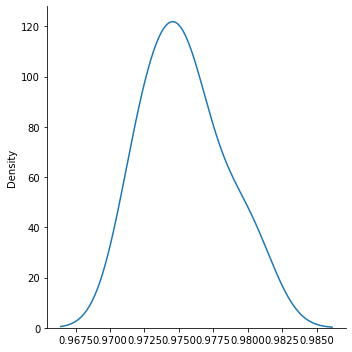

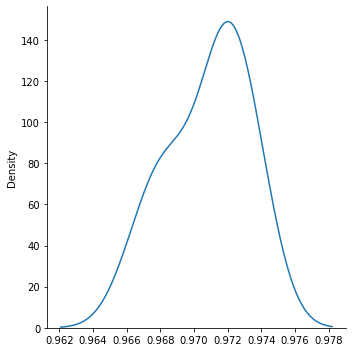

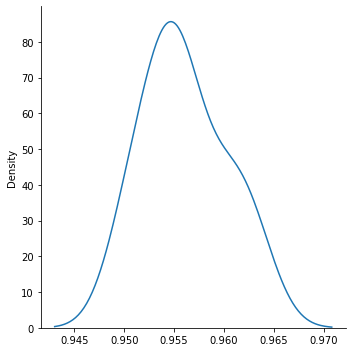

In [29]:
import seaborn as sns
sns.displot(svm_results, kind='kde') # they all look like a normal distribution
sns.displot(mlp_results, kind='kde') 
sns.displot(randomf_results, kind='kde') 

In [34]:
from scipy.stats import f_oneway
_, p = f_oneway(mlp_results, svm_results, randomf_results)
p # 3.78 . 10^-13

3.7861201849306944e-13

In [37]:
alpha = 0.05
if p <= alpha:
  print('Null hypothesis was rejected. There are statistical differences.')
else:
  print('Alternative hypothesis rejected. There are not statistical differences.')

Null hypothesis was rejected. There are statistical differences.


In [39]:
import numpy as np
algo_results = {'accuracy': np.concatenate([mlp_results, svm_results, randomf_results]),
                'algorithm': ['mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp',
                 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 
                 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', ]}

In [ ]:
import pandas as pd
df_results = pd.DataFrame(algo_results)
df_results

In [44]:
from statsmodels.stats.multicomp import MultiComparison
algo_comparison = MultiComparison(df_results['accuracy'], df_results['algorithm'])
statistical_tests = algo_comparison.tukeyhsd()
print(statistical_tests)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   mlp     rf  -0.0147  0.001 -0.0183 -0.0112   True
   mlp    svm   0.0046 0.0099   0.001  0.0081   True
    rf    svm   0.0193  0.001  0.0158  0.0229   True
----------------------------------------------------


In [45]:
results.mean() # svm is better than the others, because there are statistical differences.

Decision tree     0.938506
SVM               0.975388
Random forest     0.956071
Neural Network    0.970818
dtype: float64

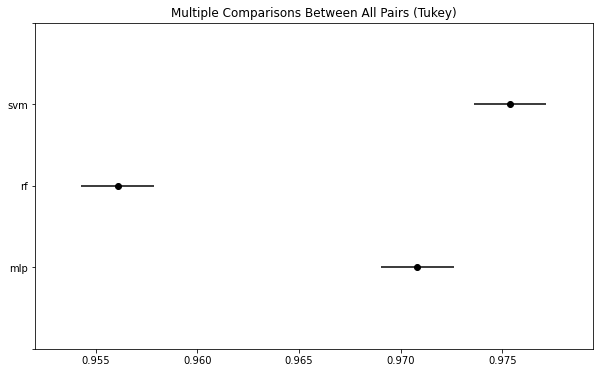

In [49]:
statistical_tests.plot_simultaneous();